# Sklearn Digits Data Analysis

### Getting the data in order

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

digits = datasets.load_digits()

In [180]:
X = digits.data
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [181]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [182]:
print(X.shape)

(1797, 64)


In [183]:
y = digits.target
print(y)

[0 1 2 ... 8 9 8]


In [184]:
print(y.shape)

(1797,)


### Performing K-fold Cross Validation

In [185]:
def do_Kfold(model, X, y, k, scaler = None, random_state = 146):
    from sklearn.model_selection import KFold

    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))

    return train_scores, test_scores

In [186]:
from sklearn.svm import SVC as SVC

In [187]:
svc = SVC()

In [188]:
results = do_Kfold(model = svc, X = digits.data, y = y, k = 25, scaler = None, random_state = 146)

In [189]:
results

([0.9959420289855072,
  0.9959420289855072,
  0.9965217391304347,
  0.9965217391304347,
  0.9971014492753624,
  0.9965217391304347,
  0.9965217391304347,
  0.9965217391304347,
  0.9965217391304347,
  0.9971014492753624,
  0.9971014492753624,
  0.9965217391304347,
  0.9971014492753624,
  0.9965217391304347,
  0.9965217391304347,
  0.9976811594202899,
  0.9971014492753624,
  0.9965217391304347,
  0.9965217391304347,
  0.9965217391304347,
  0.9971014492753624,
  0.9965217391304347,
  0.996523754345307,
  0.996523754345307,
  0.9959443800695249],
 [1.0,
  0.9722222222222222,
  0.9861111111111112,
  0.9861111111111112,
  1.0,
  0.9861111111111112,
  1.0,
  0.9861111111111112,
  0.9722222222222222,
  0.9583333333333334,
  0.9861111111111112,
  0.9861111111111112,
  0.9861111111111112,
  1.0,
  1.0,
  0.9722222222222222,
  0.9861111111111112,
  1.0,
  0.9861111111111112,
  1.0,
  1.0,
  1.0,
  0.9859154929577465,
  1.0,
  0.9859154929577465])

In [190]:
np.mean(results[1])

0.9888732394366196

#### The scores are very good

### Now lets do a single train test split

In [191]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25)

### Then fit and score the model

In [192]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [193]:
svc.score(X_test, y_test)

0.9822222222222222

### Hyperparameter optimization

In [194]:
param_grid = dict(C=np.linspace(0.01, 10, 10), kernel = ['linear', 'poly', 'rbf', 'sigmoid'],
                  gamma = ['scale', 'auto'])
#use 10 folds
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
cv = KFold(n_splits=10, random_state=201, shuffle = True)
grid = GridSearchCV(svc, param_grid=param_grid, cv=cv, scoring='accuracy')
#create the gridsearchCV object, score on accuracy
#fit the gridsearch
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.9888888888888889

In [195]:
print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}')

The best parameters are {'C': 2.23, 'gamma': 'scale', 'kernel': 'rbf'} with a score of 0.99


In [196]:
svc = SVC(C = grid.best_params_['C'], gamma = grid.best_params_['gamma'], kernel = grid.best_params_['kernel'])
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9888888888888889

### Displaying the results

In [197]:
predicted = svc.predict(X_test)
print(predicted)

[6 2 6 3 4 8 3 4 2 6 8 0 6 1 3 7 6 3 6 8 9 8 6 7 5 9 0 7 1 4 0 3 2 2 9 7 0
 2 1 2 6 8 1 9 7 3 9 5 0 5 9 9 5 1 3 6 5 2 7 4 3 9 0 0 2 1 2 8 9 1 8 0 3 7
 8 3 3 7 9 5 6 1 3 2 5 3 2 0 0 6 9 1 9 6 2 0 8 9 6 7 6 4 9 5 8 2 6 6 5 8 5
 6 7 8 9 1 6 7 9 9 5 6 7 1 9 7 2 7 8 7 1 4 3 1 7 5 7 5 0 4 5 8 5 5 0 5 5 8
 5 4 5 7 1 4 4 3 4 4 2 6 9 2 5 2 4 0 6 0 0 0 9 0 9 7 3 8 9 6 4 5 0 8 8 8 8
 6 6 0 6 3 8 7 2 5 3 5 4 6 1 0 3 0 4 2 4 1 1 9 5 8 1 1 4 5 6 5 5 4 7 5 3 2
 1 2 2 0 3 6 3 2 7 0 1 7 3 7 7 8 5 8 9 4 3 7 1 1 1 9 3 8 8 9 0 8 8 9 1 6 3
 9 6 1 3 0 4 1 8 8 9 8 2 3 0 6 4 2 0 4 7 4 3 1 8 9 1 4 6 3 4 8 9 5 5 6 0 2
 6 6 1 6 2 3 3 5 5 0 3 5 7 5 0 1 1 9 9 4 1 3 8 9 5 6 8 7 2 1 9 7 5 6 8 7 7
 6 5 2 2 4 9 9 4 9 4 4 0 5 6 9 3 2 6 0 4 3 7 2 4 0 8 6 6 3 2 3 8 1 5 6 9 7
 9 6 2 5 2 4 7 6 6 6 5 6 1 5 8 8 2 8 8 6 7 4 3 9 7 1 7 3 0 1 5 9 4 0 7 6 3
 7 1 9 2 1 9 0 3 7 3 2 5 4 9 0 5 9 4 7 8 4 4 8 4 9 7 7 0 7 4 2 0 8 5 9 8 1
 5 4 5 3 2 5]


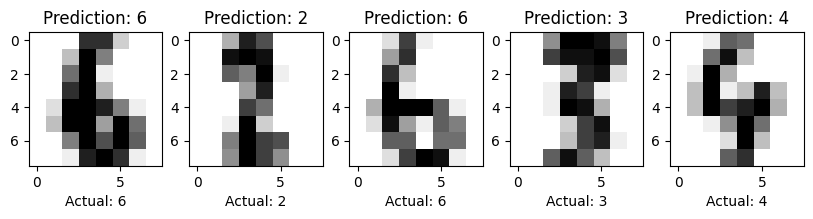

In [198]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
for ax, image, prediction, actual in zip(axes, X_test[0:5], predicted[0:5], y_test[0:5]):
    # ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
    ax.set_xlabel(f"Actual: {actual}")

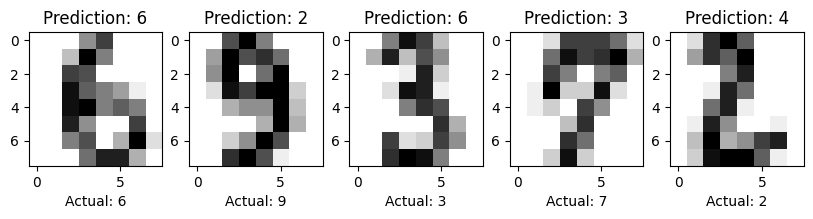

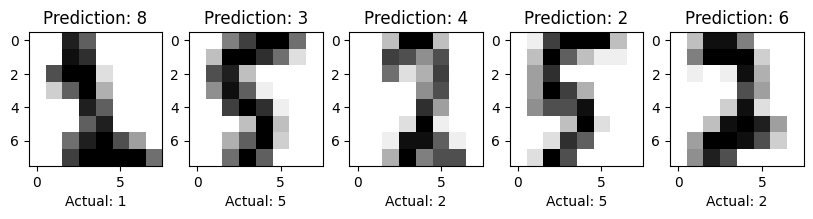

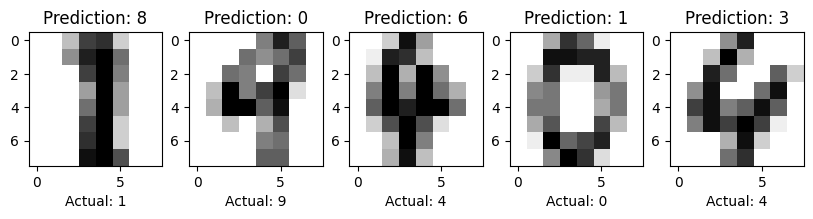

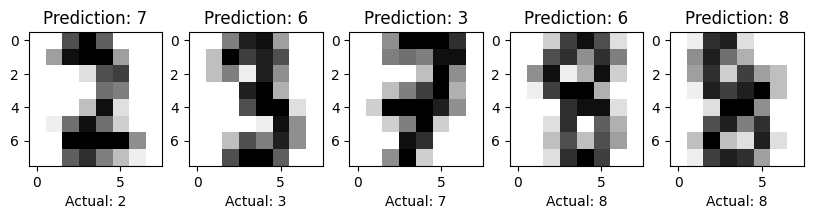

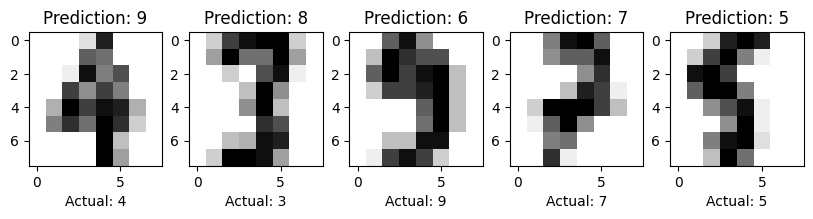

In [207]:
for i in np.arange(0, 25, 5):
    _, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
    for ax, image, prediction, actual in zip(axes, X_test[(i):(i+5)], predicted[(i):(i+5)], y_test[(i):(i+5)]):
        # ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}")
        ax.set_xlabel(f"Actual: {actual}")

## Training a basic Keras Neural Network

In [200]:
from sklearn.model_selection import train_test_split as tts

In [217]:
import tensorflow as tf

# Load the digits dataset
digits = datasets.load_digits()
y = digits.target

# Reshape the input data to fit the expected input shape of the Conv2D layer
X = digits.images.reshape(-1, 8, 8, 1)  # Assuming the original image size is 8x8

# Normalize the input data
X = X / 16.0  # Since pixel values range from 0 to 16

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)


In [209]:
X_train.shape

(1437, 8, 8, 1)

In [211]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels,epochs=38)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/38
43/43 [==============================] - 1s 3ms/step - loss: 1.7188 - accuracy: 0.4729
Epoch 2/38
43/43 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.8909
Epoch 3/38
43/43 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.9428
Epoch 4/38
43/43 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.9577
Epoch 5/38
43/43 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9681
Epoch 6/38
43/43 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9792
Epoch 7/38
43/43 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9844
Epoch 8/38
43/43 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9881
Epoch 9/38
43/43 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9903
Epoch 10/38
43/43 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9903
Ep

## Using a convolutional neural network

In [210]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(8, 8, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(X_train, y_train, epochs=38)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(X_test, y_test)


Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d_74 (MaxPooli  (None, 3, 3, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_75 (Flatten)        (None, 288)               0         
                                                                 
 dense_150 (Dense)           (None, 128)               36992     
                                                                 
 dense_151 (Dense)           (None, 10)                1290      
                                                                 
Total params: 38602 (150.79 KB)
Trainable params: 38602 (150.79 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

## The final accuracy scores for the convolutional neural network are higher on average than the basic neural network. However, the grid search svm yielded *slightly* higher scores than the convolutional neural network because this is just a simple task. In more complicated examples, one can see the effectivness of neural networks on full display

## Let's create some functions and callbacks to simplify things.

In [220]:
def reshape_and_normalize(X, y):

    digits = datasets.load_digits()

    y = digits.target

    # Reshape the images to add an extra dimension
    X = X.reshape(-1, 8, 8, 1)  # Assuming the original image size is 8x8

    # Normalize the input data
    X = X / 16.0  # Since pixel values range from 0 to 16

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [221]:
X_train, X_test, y_train, y_test = reshape_and_normalize(X, y)

print(f"Maximum pixel value after normalization: {np.max(X_train)}\n")
print(f"Shape of training set after reshaping: {X_train.shape}\n")
print(f"Shape of one image after reshaping: {X_train[0].shape}")

Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (1437, 8, 8, 1)

Shape of one image after reshaping: (8, 8, 1)


In [222]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            # if logs.get('accuracy') > 0.95:
            if logs.get('accuracy') > 0.95:

                print("\nReached 95% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

In [226]:
def convolutional_model():

    #Define the model
    model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(8, 8, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])


    # Use same settings
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model

In [227]:
model = convolutional_model()

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(X_train, y_train, epochs=38, callbacks=[callbacks])

Epoch 1/38
45/45 [==============================] - 2s 10ms/step - loss: 2.0430 - accuracy: 0.5372
Epoch 2/38
45/45 [==============================] - 1s 17ms/step - loss: 1.0580 - accuracy: 0.8601
Epoch 3/38
45/45 [==============================] - 1s 17ms/step - loss: 0.4357 - accuracy: 0.9102
Epoch 4/38
45/45 [==============================] - 0s 6ms/step - loss: 0.2778 - accuracy: 0.9374
Epoch 5/38
39/45 [=========================>....] - ETA: 0s - loss: 0.2096 - accuracy: 0.9519
Reached 95% accuracy so cancelling training!
45/45 [==============================] - 0s 6ms/step - loss: 0.2070 - accuracy: 0.9513
